# This work was done by:

    ELGHABI Taha
    EL Batouri Badr-eddine

## Car-Price-Prediction


Problem Statement: A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1- Which variables are significant in predicting the price of a car
2- How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

Business Goal: You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

DATA DICTONARY						
						
1	Car_ID			    Unique id of each observation (Interger)		
2	Symboling 			Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
3	carCompany			Name of car company (Categorical)		
4	fueltype			Car fuel type i.e gas or diesel (Categorical)		
5	aspiration			Aspiration used in a car (Categorical)		
6	doornumber			Number of doors in a car (Categorical)		
7	carbody			    body of car (Categorical)		
8	drivewheel			type of drive wheel (Categorical)		
9	enginelocation			Location of car engine (Categorical)		
10	wheelbase			Weelbase of car (Numeric)		
11	carlength			Length of car (Numeric)		
12	carwidth			Width of car (Numeric)		
13	carheight			height of car (Numeric)		
14	curbweight			The weight of a car without occupants or baggage. (Numeric)		
15	enginetype			Type of engine. (Categorical)		
16	cylindernumber			cylinder placed in the car (Categorical)		
17	enginesize			Size of car (Numeric)		
18	fuelsystem			Fuel system of car (Categorical)		
19	boreratio			Boreratio of car (Numeric)		
20	stroke			   Stroke or volume inside the engine (Numeric)		
21	compressionratio			compression ratio of car (Numeric)		
22	horsepower			Horsepower (Numeric)		
23	peakrpm		    car peak rpm (Numeric)		
24	citympg		    Mileage in city (Numeric)		
25	highwaympg 			Mileage on highway (Numeric)		
26	price(Dependent variable)			Price of car (Numeric)		
						
						**Source: https://archive.ics.uci.edu/ml/datasets/Automobile


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.feature_selection import RFE
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

#### Reading the data:

In [3]:
cars_data = pd.read_csv('CarPrice_Assignment.csv')
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#shape of the data
cars_data.shape

(205, 26)

In [5]:
#info the dataframe
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#describe the data
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Data Cleaning:

In [7]:
cars_data.duplicated(subset = ['car_ID']).sum()

0

No duplicate records.

In [8]:
cars_data = cars_data.drop(['car_ID'], axis =1)#non significant column

In [9]:
cars_data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
#explore symboling column


symboling column- Its assigned insurance risk rating, 
A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

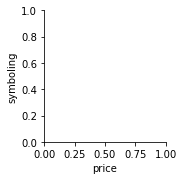

In [11]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data = cars_data)

In [12]:
#explore Column CarName
cars_data['CarName'].value_counts()

toyota corona           6
peugeot 504             6
toyota corolla          6
subaru dl               4
mitsubishi outlander    3
                       ..
dodge rampage           1
subaru baja             1
toyouta tercel          1
dodge colt (sw)         1
dodge coronet custom    1
Name: CarName, Length: 147, dtype: int64

We see that CarName is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. 

In [13]:
#keep onlu car company  as new variable added to the dataset as car_company
cars_data['car_company'] = cars_data['CarName'].apply(lambda x:x.split(' ')[0])

In [14]:
#rechecking
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [15]:
#deleting the original column
cars_data = cars_data.drop(['CarName'], axis =1)

In [16]:
#explore car_company column 
cars_data['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
alfa-romero     3
jaguar          3
maxda           2
vw              2
renault         2
toyouta         1
vokswagen       1
Nissan          1
porcshce        1
mercury         1
Name: car_company, dtype: int64

We see some spelling mistakes in the data.

In [17]:
cars_data['car_company'].replace('toyouta', 'toyota',inplace=True)
cars_data['car_company'].replace('Nissan', 'nissan',inplace=True)
cars_data['car_company'].replace('maxda', 'mazda',inplace=True)
cars_data['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
cars_data['car_company'].replace('vw', 'volkswagen',inplace=True)
cars_data['car_company'].replace('porcshce', 'porsche',inplace=True)

In [18]:
#rechecking the data:


In [19]:
# fueltype - Car fuel type i.e gas or diesel
cars_data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [20]:
#aspiration - Aspiration used in a car
cars_data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [21]:
#doornumber - Number of doors in a car
cars_data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

As there are numbers, let us convert these numbers into numeric form.

In [22]:
def number_(x):
    return x.map({'four':4, 'two': 2})
    
cars_data['doornumber'] = cars_data[['doornumber']].apply(number_)

In [23]:
#rechecking
cars_data['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [24]:
#carbody- body of car
cars_data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [25]:
#drivewheel - type of drive wheel
cars_data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [26]:
#enginelocation - Location of car engine
cars_data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [27]:
#wheelbase - Weelbase of car 
cars_data['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
98.4     7
Name: wheelbase, dtype: int64

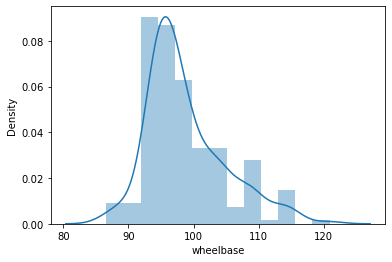

In [28]:
sns.distplot(cars_data['wheelbase'])
plt.show()

In [29]:
#carlength - Length of car
cars_data['carlength'].value_counts().head()

157.3    15
188.8    11
166.3     7
171.7     7
186.7     7
Name: carlength, dtype: int64

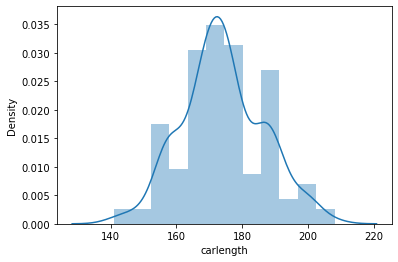

In [30]:
sns.distplot(cars_data['carlength'])
plt.show()

In [31]:
#enginetype - Type of engine.
cars_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [32]:
#cylindernumber- cylinder placed in the car
cars_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

As there are numbers, let us convert these numbers into numeric form.

In [33]:
def convert_number(x):
    return #add your code her

cars_data['cylindernumber'] = cars_data[['cylindernumber']].apply(convert_number)

In [34]:
#re-checking
cars_data['cylindernumber'].value_counts()

Series([], Name: cylindernumber, dtype: int64)

In [35]:
#fuelsystem - Fuel system of car
cars_data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

We have almost looked into most of the column individually. Now let us explore data visulaization to look for any patterns. 

#### Data Visulaization:

In [36]:
cars_numeric = cars_data.select_dtypes(include =['int64','float64'])
cars_numeric.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 2160x2160 with 0 Axes>

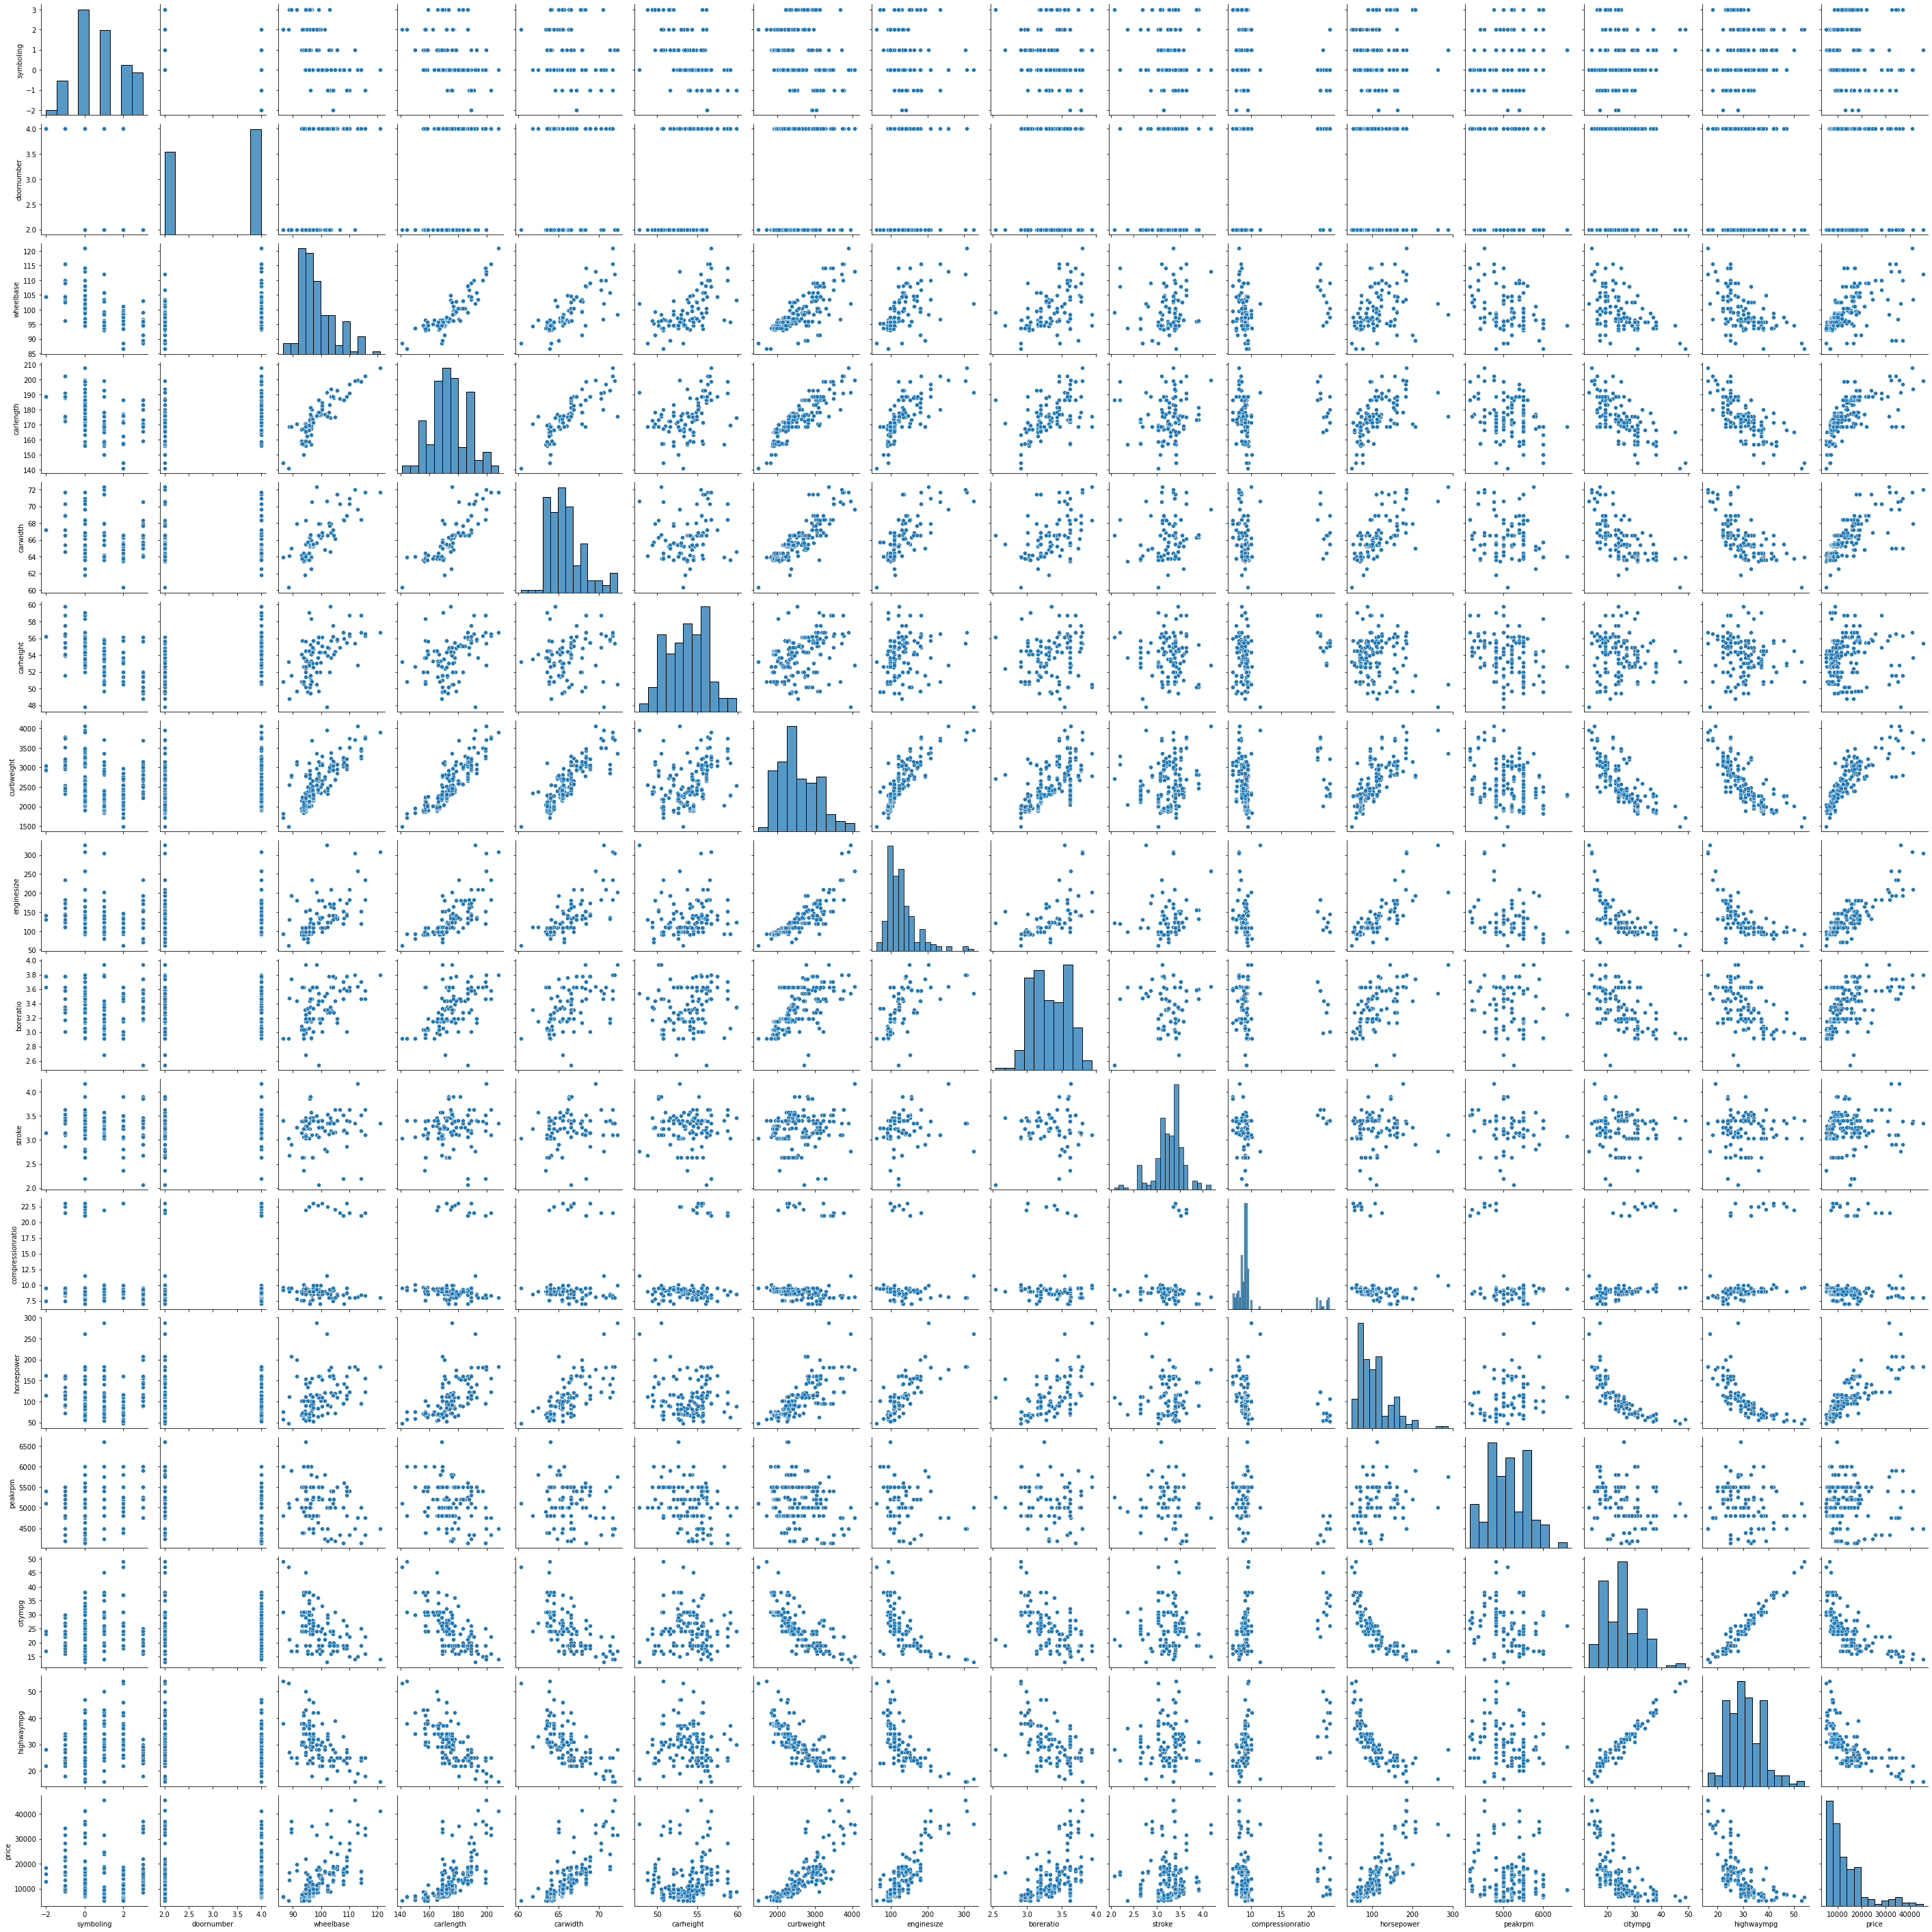

In [37]:
plt.figure(figsize = (30,30))
sns.pairplot(cars_numeric)
plt.show()

As there are lot of columns- we can't make out really much from above graph. Let us check the correlation.

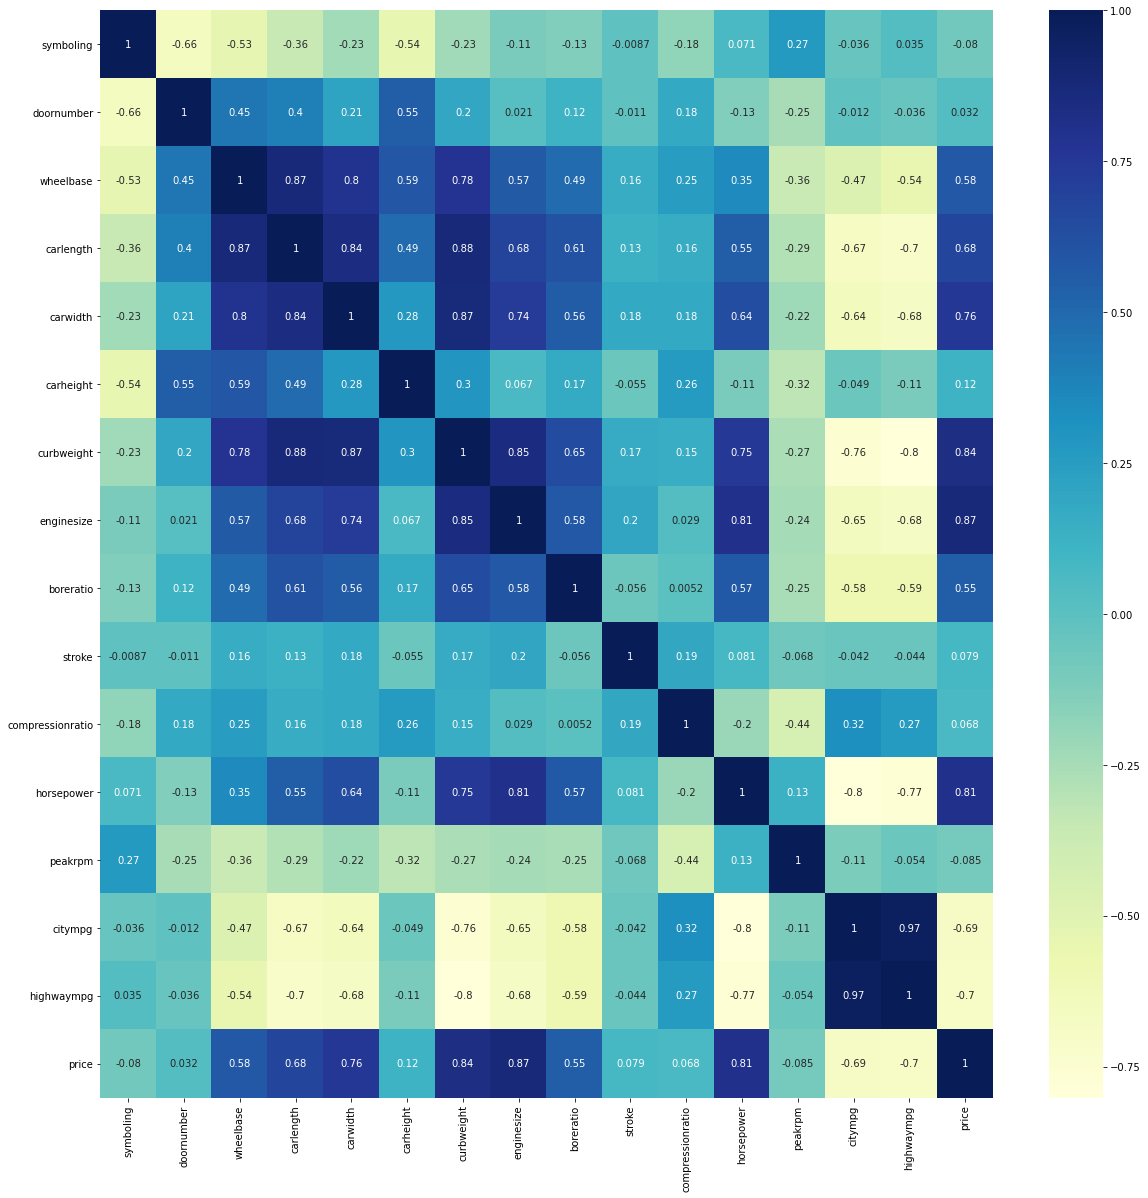

In [38]:
plt.figure(figsize = (20,20))
sns.heatmap(cars_data.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.

- Price is negatively correlated to symboling, citympg and highwaympg.
- This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower.

- There are many independent variables which are highly correlated: wheelbase, carlength, curbweight, enginesize etc.. all are positively correlated.

In [39]:
categorical_cols = cars_data.select_dtypes(include = ['object'])
categorical_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,NaN,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,NaN,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,NaN,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,NaN,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,NaN,mpfi,audi


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

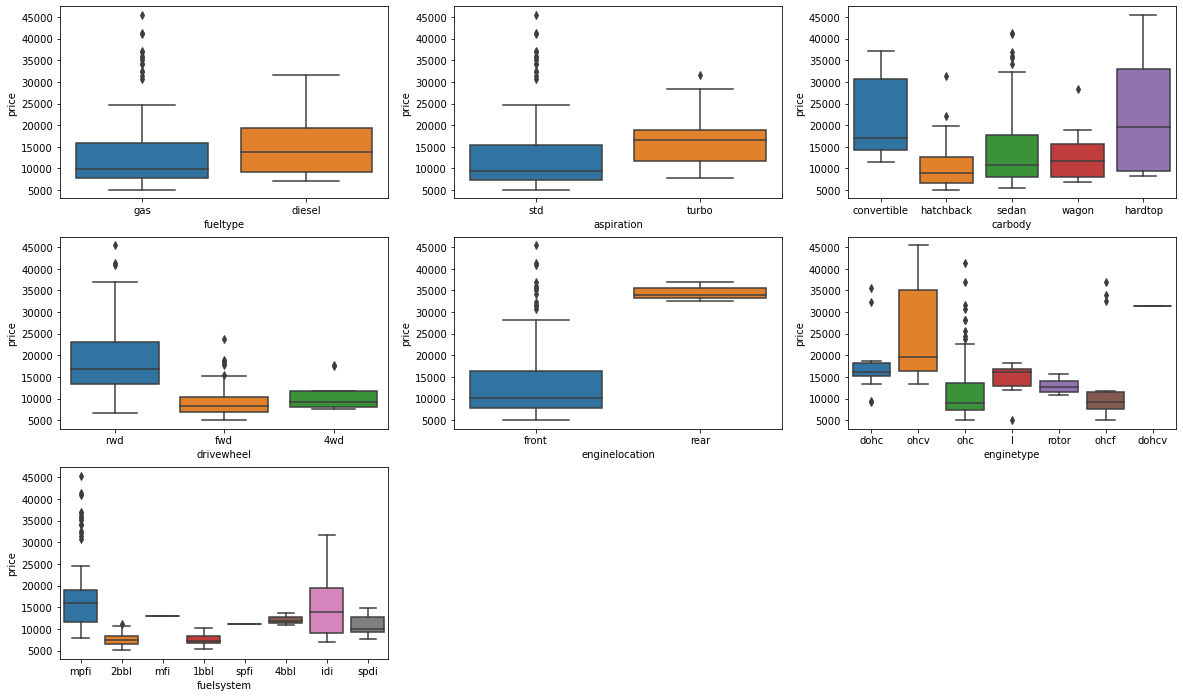

In [40]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_data)

<AxesSubplot:xlabel='car_company', ylabel='price'>

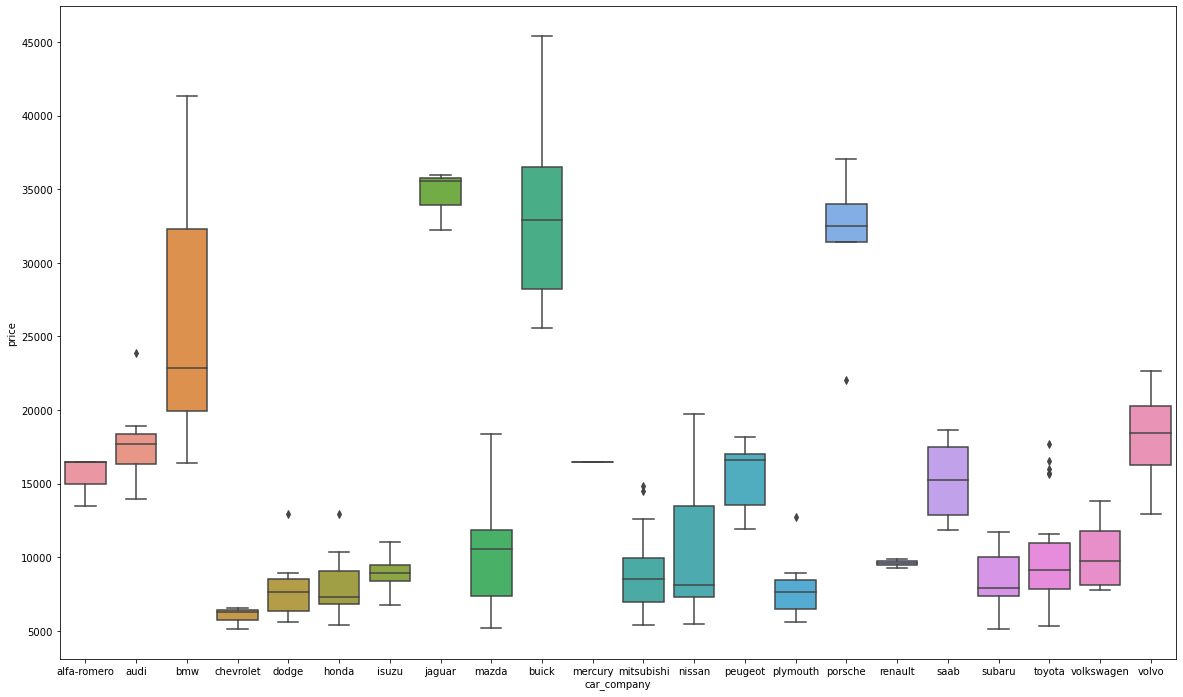

In [41]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'car_company', y = 'price', data = cars_data)

    1.From the price boxplot it is clear that The brands with the most expensive vehicles in the dataset belong to Bmw,Buick,Jaguar and porsche.
    2. Whereas the lower priced cars belong to chevrolet
    3. The median price of gas vehicles is lower than that of Diesel Vehicles.
    4. 75th percentile of standard aspirated vehicles have a price lower than the median price of turbo aspirated vehicles. 
    5. Two and four Door vehicles are almost equally priced. There are however some outliers in the price of 
    two-door vehicles. 
    6. Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have 
    the highest median price.
    7. The price of vehicles with rear placed engines is significantly higher than the price of vehicles with front 
    placed engines. 
    8. Almost all vehicles in the dataset have engines placed in the front of the vehicle. However, the price of 
    vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines. 
    9. The median cost of eight cylinder vehicles is higher than other cylinder categories.
    10. It is clear that vehicles Multi-port Fuel Injection [MPFI] fuelsystem have the highest median price. There are 
    also some outliers on the higher price side having MPFI systems.
    11. Vehicles with OHCV engine type falls under higher price range.

#### Data preparation:

In [42]:
#creating dummies for categorical data
cars_dummies = pd.get_dummies(categorical_cols)

In [43]:
car_df  = pd.concat([cars_data, cars_dummies], axis =1)

In [44]:
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'car_company', 'cylindernumber'], axis =1)

In [45]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   doornumber               205 non-null    int64  
 2   wheelbase                205 non-null    float64
 3   carlength                205 non-null    float64
 4   carwidth                 205 non-null    float64
 5   carheight                205 non-null    float64
 6   curbweight               205 non-null    int64  
 7   enginesize               205 non-null    int64  
 8   boreratio                205 non-null    float64
 9   stroke                   205 non-null    float64
 10  compressionratio         205 non-null    float64
 11  horsepower               205 non-null    int64  
 12  peakrpm                  205 non-null    int64  
 13  citympg                  205 non-null    int64  
 14  highwaympg               2

#### Spliting the data into test and train

In [46]:
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
df_train.shape

(143, 67)

In [48]:
df_test.shape

(62, 67)

#### Rescaling the data:

In [49]:
cars_numeric.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [50]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [51]:
scaler = StandardScaler()

In [52]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [53]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.473477e-17,9.006005e-17,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,-1.894367e-16,-4.308908e-17,-1.059758e-15,2.155230e-15,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-1.566427e+00,-2.412359e+00,-3.403827e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-6.847340e-01,-9.320600e-01,-4.497569e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.701590e-01,8.874120e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,-3.663447e-01,9.948427e-03,6.399437e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.701590e-01,8.874120e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,3.928914e-01,8.942829e-01,4.814173e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.848278e+00,8.874120e-01,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,4.923816e+00,2.432256e+00,2.953845e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model building:

In [54]:
y_train = df_train.pop('price')
X_train = df_train


In [55]:
y_train

122   -0.700201
125    1.151929
166   -0.452248
1      0.442646
199    0.757569
         ...   
87    -0.485539
103    0.056898
67     1.606189
24    -0.877586
8      1.390627
Name: price, Length: 143, dtype: float64

#### Model building using LinearRegression:

In [56]:
lr = LinearRegression()
model=lr.fit(X_train,y_train)
y_train.shape

(143,)

In [57]:
model.intercept_


7389431144736.072

In [58]:
model.coef_

array([ 2.04990680e-03,  2.73797097e-02,  2.40246719e-01, -1.22489011e-01,
        2.11122495e-01, -1.66124410e-01,  3.34551667e-01,  6.84660053e-01,
       -1.53145768e-01, -6.17758292e-02, -7.22528027e-01, -1.76752673e-01,
        1.97995104e-01,  9.33487237e-02,  8.99945561e-02, -4.16667882e+12,
       -3.15318915e+12, -6.17178527e+11, -6.17178527e+11, -2.51580407e+12,
       -2.51580407e+12, -2.51580407e+12, -2.51580407e+12, -2.51580407e+12,
        1.41485578e+12,  1.41485578e+12,  1.41485578e+12,  4.93080925e+11,
        6.07088487e+11, -2.81942016e+12, -2.81942016e+12, -2.81942016e+12,
       -2.81942016e+12, -2.93342772e+12, -2.81942016e+12, -2.81942016e+12,
        2.25729121e+11,  2.25729121e+11,  2.25729121e+11,  1.23921879e+12,
        4.27004370e+09,  2.25729121e+11,  2.25729121e+11, -1.55670331e+09,
       -4.17505059e+11, -4.17505059e+11, -4.17505059e+11, -4.17505059e+11,
       -4.17505059e+11, -4.17505059e+11, -4.17505059e+11, -4.17505059e+11,
       -4.17505059e+11, -

So linear equation for price can be given as: 𝑝𝑟𝑖𝑐𝑒 = 0.9+ -8.85082799e-03 × symboling .....+

In [59]:

df_test[col_list] = scaler.transform(df_test[col_list])
y_test = df_test.pop('price')
X_test = df_test

In [60]:
y_pred = model.predict(X_test)

#### Evaluation:

In [61]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

In [62]:
mse

4.4357006887907335e+21

In [63]:

r_squ = r2_score(y_test,y_pred)
r_squ

-3.83361485766899e+21

#### Model building using RFE

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [1]:
LM = LinearRegression()
rfe = RFE(LM, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train,y_train)

NameError: name 'LinearRegression' is not defined

In [ ]:
rfe.n_features_

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
cols = X_train.columns[rfe.support_]
cols

#### Model 1:

In [ ]:
X1 = X_test[cols]
y_pred = rfe.predict(X_test)

In [ ]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
print("the mean squares error ",mse)
print("the r2 score is ",r2_score(y_test,y_pred))
print("The previous value of mse is : 4.430416020688372e+22")
print("The previous value of r2 score was: -3.829047511137639e+22")

#### Building the model with 10 variables:

#### Which variables are significant in predicting the price of a car?

    enginesize
    carwidth
    enginetype_rotor
    car_company_bmw
    enginelocation_rear
    car_company_renault (-vely)
    
These are the variables that are significant in predicting the price of a car.